In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6071,62,0,2,130,263,0,0,97,0,1.2,1,1,2,1
6072,58,0,3,100,248,0,2,122,0,1.0,1,0,0,0
6073,59,1,3,138,271,0,2,182,0,0.0,0,0,0,0
6074,56,1,3,130,283,1,2,103,1,1.6,2,0,2,1
6075,50,1,3,150,243,0,2,128,0,2.6,1,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6076 entries, 0 to 6075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       6076 non-null   int64  
 1   sex       6076 non-null   int64  
 2   cp        6076 non-null   int64  
 3   trestbps  6076 non-null   int64  
 4   chol      6076 non-null   int64  
 5   fbs       6076 non-null   int64  
 6   restecg   6076 non-null   int64  
 7   thalach   6076 non-null   int64  
 8   exang     6076 non-null   int64  
 9   oldpeak   6076 non-null   float64
 10  slope     6076 non-null   int64  
 11  ca        6076 non-null   int64  
 12  thal      6076 non-null   int64  
 13  target    6076 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 664.7 KB


## Split Data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = data.drop(columns=['target'])
y = data['target']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes

In [8]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Buat model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Akurasi Model: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', report)

# Prediksi data baru (contoh input)
data_baru = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Sesuaikan input

# Normalisasi data baru
data_baru = scaler.transform(data_baru)

# Prediksi hasil data baru
hasil_prediksi = model.predict(data_baru)
print(f'Prediksi untuk data baru: {"Penyakit Jantung" if hasil_prediksi[0] == 1 else "Sehat"}')

Akurasi Model: 0.73
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       640
           1       0.71      0.72      0.72       576

    accuracy                           0.73      1216
   macro avg       0.73      0.73      0.73      1216
weighted avg       0.73      0.73      0.73      1216

Prediksi untuk data baru: Sehat


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Support Vector Machine (SVM)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Buat dan latih model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Prediksi
y_pred = svm_model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9104
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       640
           1       0.91      0.89      0.90       576

    accuracy                           0.91      1216
   macro avg       0.91      0.91      0.91      1216
weighted avg       0.91      0.91      0.91      1216



In [10]:
from sklearn.model_selection import cross_val_score

svm = SVC(C=1, kernel='rbf', gamma='scale')
scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')

print(f"Akurasi rata-rata SVM: {scores.mean():.4f}")

Akurasi rata-rata SVM: 0.6116


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.9487654320987653


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [10, 50, 100, 500, 1000],
    'gamma': [0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'],
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 50, 'gamma': 'scale'}
Best Accuracy: 0.9493827160493827


## Convolution Neural Network (CNN)

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build CNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16)

# Evaluate model
eval_result = model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_result[0]:.4f}")
print(f"Test Accuracy: {eval_result[1]:.4f}")

C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5678 - loss: 0.6836 - val_accuracy: 0.7294 - val_loss: 0.5177
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7204 - loss: 0.5149 - val_accuracy: 0.7654 - val_loss: 0.4664
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7691 - loss: 0.4680 - val_accuracy: 0.8045 - val_loss: 0.4280
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4327 - val_accuracy: 0.8128 - val_loss: 0.4099
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4225 - val_accuracy: 0.8086 - val_loss: 0.4003
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4022 - val_accuracy: 0.8210 - val_loss: 0.3834
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8213 - loss: 0.3869 - val_accuracy: 0.8241 - val_loss: 0.3751
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8023 - loss: 0.3959 - val_accuracy: 0.

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Misalkan X adalah fitur dan y adalah label
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ubah data ke bentuk 3D untuk CNN
# (samples, features, 1) -> kita hanya menambah dimensi untuk 'channel'
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Membuat model CNN
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))  # Layer Conv1D
model.add(MaxPooling1D(2))  # Layer Pooling
model.add(Flatten())  # Flatten output dari Conv1D ke bentuk vektor
model.add(Dense(64, activation='relu'))  # Dense Layer
model.add(Dense(1, activation='sigmoid'))  # Output Layer (Binary classification)

# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
y_pred = (model.predict(X_test) > 0.5).astype('int32')  # Prediksi dengan threshold 0.5

# Hitung akurasi
cnn_accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi CNN: {cnn_accuracy:.4f}")

Epoch 1/20


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6640 - loss: 0.6013 - val_accuracy: 0.7336 - val_loss: 0.5021
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7556 - loss: 0.4903 - val_accuracy: 0.7582 - val_loss: 0.4689
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7746 - loss: 0.4528 - val_accuracy: 0.7977 - val_loss: 0.4203
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8164 - loss: 0.4105 - val_accuracy: 0.8289 - val_loss: 0.3885
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8340 - loss: 0.3763 - val_accuracy: 0.8512 - val_loss: 0.3621
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8518 - loss: 0.3514 - val_accuracy: 0.8331 - val_loss: 0.3636
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8640 - loss: 0.3309 - val_accuracy: 0.8660 - val_loss: 0.3262
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8941 - loss: 0.2886 - val_accuracy: 0.8668 - val_

In [29]:
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K-nearest neighbors(KNN)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       644
           1       0.84      0.86      0.85       572

    accuracy                           0.86      1216
   macro avg       0.86      0.86      0.86      1216
weighted avg       0.86      0.86      0.86      1216



## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prediksi
y_pred = tree_model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Decision Tree: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Akurasi Decision Tree: 0.9449
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       644
           1       0.93      0.96      0.94       572

    accuracy                           0.94      1216
   macro avg       0.94      0.95      0.94      1216
weighted avg       0.95      0.94      0.94      1216



## C-45

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree pakai C4.5 (pakai entropy)
c45_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
c45_model.fit(X_train, y_train)

# Prediksi
y_pred = c45_model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi C4.5 (Decision Tree dengan Entropy): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Akurasi C4.5 (Decision Tree dengan Entropy): 0.9482
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       644
           1       0.94      0.96      0.95       572

    accuracy                           0.95      1216
   macro avg       0.95      0.95      0.95      1216
weighted avg       0.95      0.95      0.95      1216



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf:.4f}")

Akurasi Random Forest: 0.9663


In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

In [36]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

nn_predictions = nn.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Akurasi Random Forest: {rf_accuracy:.4f}")

Akurasi Random Forest: 0.9663


In [38]:
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Akurasi Neural Network: {nn_accuracy:.4f}")

Akurasi Neural Network: 0.7434


In [39]:
from sklearn.linear_model import LogisticRegression

# Gabungkan prediksi sebagai fitur baru
combined_predictions = np.column_stack((rf_predictions, nn_predictions))

# Gunakan model lain untuk memprediksi hasil akhir
final_model = LogisticRegression()
final_model.fit(combined_predictions, y_test)

final_predictions = final_model.predict(combined_predictions)

In [40]:
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Akurasi Gabungan: {final_accuracy:.4f}")

Akurasi Gabungan: 0.9663


In [41]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search untuk Random Forest
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lihat parameter terbaik dan akurasi terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9613168724279835


In [42]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Latih model XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Prediksi dan hitung akurasi
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"Akurasi XGBoost: {xgb_accuracy:.4f}")

Akurasi XGBoost: 0.9613


In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Definisikan model-model yang akan digabungkan
rf = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True)
nn = MLPClassifier(hidden_layer_sizes=(100,))

# Gabungkan model dalam voting classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('nn', nn)], voting='soft')

# Latih Voting Classifier
voting_clf.fit(X_train, y_train)

# Prediksi dan hitung akurasi
voting_predictions = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)

print(f"Akurasi Voting Classifier: {voting_accuracy:.4f}")

Akurasi Voting Classifier: 0.9474


In [44]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Latih model dengan data SMOTE
rf.fit(X_train_smote, y_train_smote)

# Prediksi dan hitung akurasi
rf_smote_predictions = rf.predict(X_test)
rf_smote_accuracy = accuracy_score(y_test, rf_smote_predictions)

print(f"Akurasi dengan SMOTE: {rf_smote_accuracy:.4f}")

Akurasi dengan SMOTE: 0.9663


In [45]:
from sklearn.model_selection import cross_val_score

# Gunakan cross-validation pada Random Forest
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Akurasi rata-rata dengan Cross-Validation: {cv_scores.mean():.4f}")

Akurasi rata-rata dengan Cross-Validation: 0.9435


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Misalkan X dan y adalah data fitur dan label
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Lakukan k-fold cross-validation, misal k=5
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Cetak hasil akurasi tiap fold dan rata-ratanya
print(f"Akurasi tiap fold: {cv_scores}")
print(f"Akurasi rata-rata k-fold: {cv_scores.mean():.4f}")

Akurasi tiap fold: [1.         1.         0.95473251 0.80823045 0.9473251 ]
Akurasi rata-rata k-fold: 0.9421


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7031
Log Loss: 0.6019
F1-Score: 0.7028
Precision: 0.7028
Recall: 0.7031


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Model
nb = GaussianNB()

# Daftar parameter yang diuji
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Grid Search
grid_search = GridSearchCV(nb, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'var_smoothing': 1e-06}
Best Accuracy: 0.7146090534979425


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7031
Log Loss: 0.6019
F1-Score: 0.7028
Precision: 0.7028
Recall: 0.7031


In [50]:
from sklearn.metrics import confusion_matrix

# Setelah prediksi ya, contoh:
y_pred = model.predict(X_test)

# Bikin Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


TP = cm[1, 1]  # True Positive (Prediksi 1, sebenarnya 1)
TN = cm[0, 0]  # True Negative (Prediksi 0, sebenarnya 0)
FP = cm[0, 1]  # False Positive (Prediksi 1, sebenarnya 0)
FN = cm[1, 0]  # False Negative (Prediksi 0, sebenarnya 1)

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
# Biar aman, ulang fit scaler pakai data training dulu
scaler = StandardScaler()
scaler.fit(X_train)

# Input data baru
import numpy as np

data_baru = np.array([[63, 1, 0, 145, 233, 1, 2, 150, 0, 2.3, 2, 0, 1]])

# Normalisasi
data_baru = scaler.transform(data_baru)

# Prediksi hasil
prediksi = model.predict(data_baru)

if prediksi[0] == 1:
    print("Hasil Prediksi: Berisiko Penyakit Jantung")
else:
    print("Hasil Prediksi: Tidak Berisiko Penyakit Jantung")

Hasil Prediksi: Tidak Berisiko Penyakit Jantung


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# Input data baru (sesuai urutan fitur training)
import numpy as np

data_baru = np.array([[63, 1, 0, 145, 233, 1, 2, 150, 0, 2.3, 2, 0, 1]])  # contoh input

# Jangan lupa normalisasi pakai scaler yang sama
data_baru = scaler.transform(data_baru)

# Prediksi hasil
prediksi = model.predict(data_baru)

if prediksi[0] == 1:
    print("Hasil Prediksi: Berisiko Penyakit Jantung")
else:
    print("Hasil Prediksi: Tidak Berisiko Penyakit Jantung")

Hasil Prediksi: Tidak Berisiko Penyakit Jantung


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score
import numpy as np

# Inisialisasi k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menampung hasil tiap fold
accuracies = []
log_losses = []
f1_scores = []
precisions = []
recalls = []

# Looping k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inisialisasi model Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Evaluasi
    accuracies.append(accuracy_score(y_test, y_pred))
    log_losses.append(log_loss(y_test, y_pred_proba))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))

# Tampilkan hasil rata-rata
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Log Loss: {np.mean(log_losses):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")

NameError: name 'X' is not defined

NameError: name 'kf' is not defined

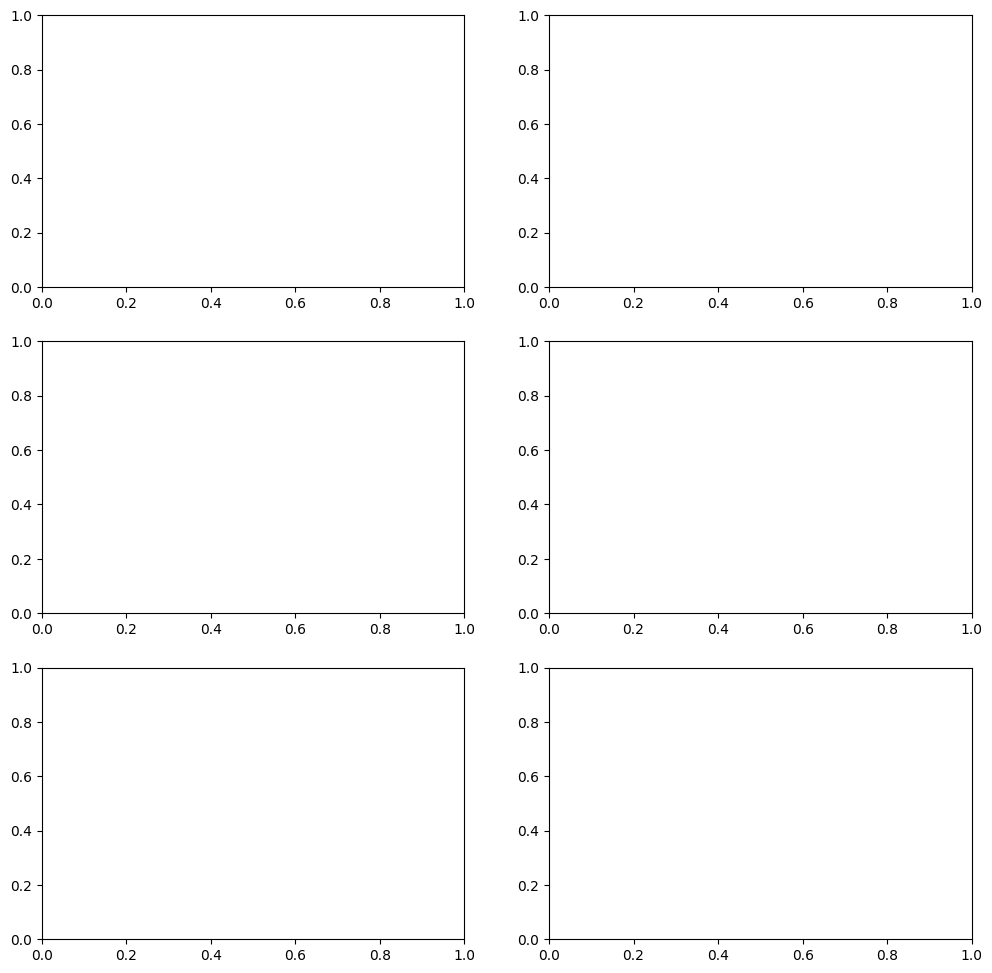

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Log Loss: {np.mean(log_losses):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")

In [ ]:
import matplotlib.pyplot as plt

# Dapatkan importance tiap fitur
importances = model.feature_importances_

# Buat plot
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, importances)
plt.xlabel('Fitur')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=45)
plt.show()
